# HW3

**Deadline:** 24.11.2024 23:59 (GMT+5)

## Task 3.1 (2 points)

Let $x_1, \dots, x_n \sim U[0,1]$. Sort them in the nondecreasing order:

$$
    x_{(1)} \leqslant x_{(2)} \leqslant \ldots \leqslant x_{(k)} \leqslant\ldots\leqslant x_{(n)}.
$$

The $k$-th element $x_{(k)}$ in this sequence is called **$k$-th order statistics**. Show that $x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$. Do it in two ways:

* **experimentally**: generate a random matrix of shape $N \times n$ (try $N = 1000, 10000, 100000$), calculate $k$-th order statistics for each row and plot historgram of these values along with pdf of beta distribution. (**1 point**)

* **theoretically**: present a mathematical proof of this statement (**1 point**)

```{warning}
To get full points for the experimental part you should avoid pythonic loops when generating random matrix. The only place where `for` loop is allowed is iterating over several values of $N$.
```

### YOUR SOLUTION HERE

Your historgram for a paticular value of $N$ should look like this:

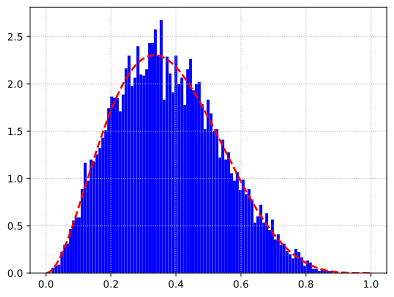

In [1]:
from scipy.stats import beta, gamma
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

def beta_hist(a, b, N=10000):
    xs = np.linspace(0.001, 0.999, num=1000)
    plt.hist(beta(a, b).rvs(size=N), bins=100, color='b', density=True)
    plt.plot(xs, beta(a, b).pdf(xs), c='r', lw=2, ls="--")
    plt.grid(ls=":")
    
beta_hist(3, 5)

For the k-th order statistic, the probability density function is :
$$
fx(k)(x) = \frac{n!}{(k-1)!(n-k)!} \cdot [F(x)]^{k-1} \cdot [1 - F(x)]^{n-k} \cdot f(x)
$$

Since $x_i∼U(0,1)$ , we have:
$F(x)=x$
$f(x)=1$, where $x∈[0,1]$

so probability density function is :
$$
fx(k)(x)=\frac{n!}{(k-1)!(n-k)!} \cdot x^{k-1} \cdot (1 - x)^{n-k}.
$$
The probability density function of the Beta distribution is :
$$
f(x;k,n+1−k)=\frac{\Gamma(n + 1)}{\Gamma(k) \Gamma(n + 1 - k)} \cdot x^{k-1} \cdot (1 - x)^{n-k}.
$$
 n is natural so Γ(n+1)=n! , then:
$$
fx(k)(x) = \frac{\Gamma(n+1)}{\Gamma(k)\Gamma(n+1-k)} \cdot x^{k-1} \cdot (1 - x)^{n-k}
$$
Which equals to Beta distribution. 

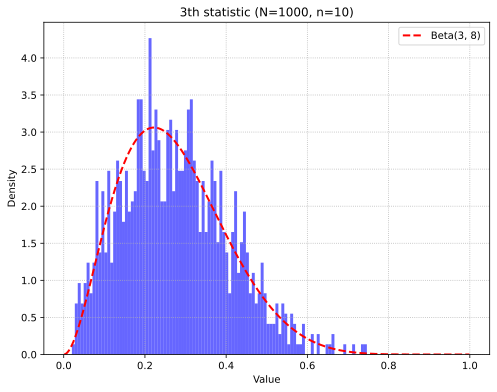

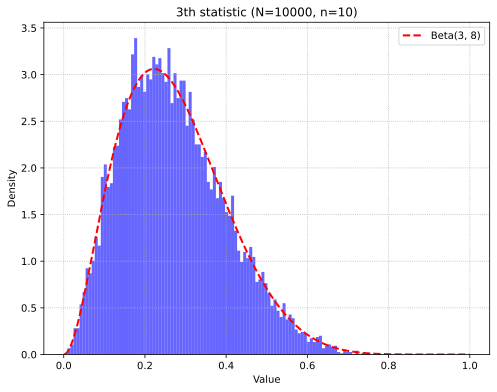

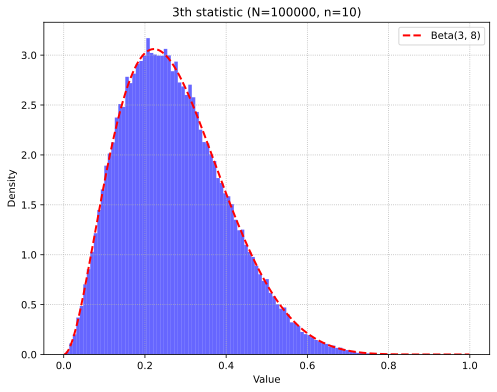

In [16]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

def order_statistic_hist(k, n, N):
    random_matrix = np.random.uniform(0, 1, (N, n))
    sorted_matrix = np.sort(random_matrix, axis=1)
    k_th_statistics = sorted_matrix[:, k - 1]
    
    a, b = k, n + 1 - k
    
    xs = np.linspace(0.001, 0.999, 1000)
    plt.figure(figsize=(8, 6))
    plt.hist(k_th_statistics, bins=100, color='b', density=True, alpha=0.6)
    plt.plot(xs, beta(a, b).pdf(xs), c='r', lw=2, ls="--", label=f'Beta({a}, {b})')
    plt.title(f"{k}th statistic (N={N}, n={n})")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(ls=":")
    plt.show()

n = 10  
k = 3   
for N in [1000, 10000, 100000]: 
    order_statistic_hist(k, n, N)

## Task 3.2 (2 points)

* Find KL divergence between $p\sim \mathrm{Geom}(s)$ and $q\sim \mathrm{Geom}(t)$, $0 < s, t < 1$. Is $\mathbb{KL}(p, q) = 0$ when $s = t$? Does equality $\mathbb{KL}(p, q) = \mathbb{KL}(q, p)$ hold? (**1.5 points**)

* Plot the graphs of $\mathbb{KL}(p, q)$ as functions of $s$ for several fixed values of $t$. (**0.5 points**)

### YOUR SOLUTION HERE

PMF for a geometric random variable is given by:
$$
p(k)=s(1-s)^k, \quad q(k) = t(1-t)^k, \quad k \in \{0, 1, 2, \dots\}.
$$
Substituting into the KL divergence formula:
$$
KL(p∥q)=\sum_{k=0}^\infty s(1-s)^k \log \frac{s(1-s)^k}{t(1-t)^k}=\sum_{k=0}^\infty s(1-s)^k \left( \log \frac{s}{t} + k \log \frac{1-s}{1-t} \right)
$$
Or
$$
KL(p∥q) = \log \frac{s}{t} \sum_{k=0}^\infty s(1-s)^k + \log \frac{1-s}{1-t} \sum_{k=0}^\infty k s(1-s)^k
$$
By using geometricc series: 
$$
s \sum_{k=0}^\infty (1-s)^k = s \cdot \frac{1}{1-(1-s)} = s \cdot \frac{1}{s} = 1
$$
And by using formula for $\sum_{k=0}^\infty k r^k = \frac{r}{(1-r)^2}$ for $|r| < 1$ gives
$$
s \sum_{k=0}^\infty k (1-s)^k = s \cdot \frac{(1-s)}{(1-(1-s))^2} = s \cdot \frac{(1-s)}{s^2} = \frac{1-s}{s}
$$
$$
\text{KL}(p \| q) = \log \frac{s}{t} \cdot 1 + \log \frac{1-s}{1-t} \cdot \frac{1-s}{s}.
$$
$$\text{KL}(p \| q) = \log \frac{s}{t} + \frac{1-s}{s} \log \frac{1-s}{1-t}.$$

The KL divergence is not symmetric because swapping $s$ and $t$ reverses the roles in the terms $\log \frac{s}{t}$ and $\log \frac{1-s}{1-t}$, which are not equal to their counterparts $\log \frac{t}{s}$ and $\log \frac{1-t}{1-s}$. Hence, $KL(p∥q)≠KL(q∥p)$ in general.

When $t = s$ :
$$
\text{KL}(p \| q) = \log \frac{s}{s} + \frac{1-s}{s} \log \frac{1-s}{1-s}.
$$
Both terms become 0, so:

$\text{KL}(p \| q) = 0$

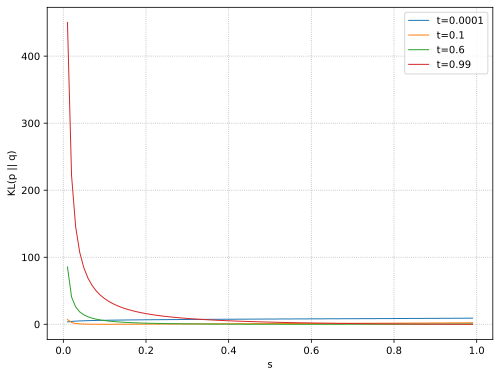

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def kl_geom(s, t):
    term1 = np.log(s / t)
    term2 = (1 - s) / s * np.log((1 - s) / (1 - t))
    return term1 + term2

s_values = np.linspace(0.01, 0.99, 100)
t_values = [0.0001 ,0.1, 0.6, 0.99]

plt.figure(figsize=(8, 6))
for t in t_values:
    kl_values = [kl_geom(s, t) for s in s_values]
    plt.plot(s_values, kl_values, label=f't={t}', lw=1)

plt.xlabel("s")
plt.ylabel("KL(p || q)")
plt.legend()
plt.grid(ls=":")
plt.show()

## Task 3.3 (2 points)

For a one-dimensional gaussian $\xi \sim \mathcal N(\mu, \sigma^2)$ there are well-known rules of one, two and three sigmas:

* one-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant \sigma) = \Phi(1) - \Phi(-1) \approx 0.6827$ 
* two-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 2\sigma) = \Phi(2) - \Phi(-2) \approx 0.9545$ 
* three-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 3\sigma) = \Phi(3) - \Phi(-3) \approx 0.9973$ 

```{figure} https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201202/20120208160239-1_0.jpg?itok=1X1a_HCs
:align: center
```

In [1]:
from scipy.stats import norm

norm.cdf(1) - norm.cdf(-1), norm.cdf(2) - norm.cdf(-2), norm.cdf(3) - norm.cdf(-3)

(np.float64(0.6826894921370859),
 np.float64(0.9544997361036416),
 np.float64(0.9973002039367398))

Compute analagous values for a 2-d gaussian distribution $\boldsymbol \xi \sim \mathcal N(\boldsymbol 0, \boldsymbol I_2)$. Namely, find $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3)$

* analytically (**1 point**)
* numerically, using `scipy` or Monte Carlo methods (**1 point**)

### YOUR SOLUTION HERE

In 2D, the probability $\mathbb{P}(\|\xi\|_2 \leq r)$ corresponds to the probability that the vector $\xi = (\xi_1, \xi_2)$, where $\xi_1, \xi_2 \sim \mathcal{N}(0, 1)$ independently, lies within a circle of radius $r$. The squared Euclidean norm of $\xi$ follows a chi-squared distribution with 2 degrees of freedom $\|\xi\|_2^2 \sim \chi^2_2$.

The cumulative distribution function (CDF) of $\chi^2_2$ is :

$F_{\chi^2_2}(x) = 1 - e^{-x/2}$.

Using the transformation $\|\xi\|_2^2 = r^2$, we have:

$\mathbb{P}(\|\xi\|_2 \leq r) = F_{\chi^2_2}(r^2) = 1 - e^{-r^2 / 2}$.

For r=1

$\mathbb{P}(\|\xi\|_2 \leq 1) = 1 - e^{-1^2 / 2} = 1 - e^{-1/2} \approx 0.3934$

For r=2

$\mathbb{P}(\|\xi\|_2 \leq 2) = 1 - e^{-2^2 / 2} = 1 - e^{-2} \approx 0.8646$

For r=3

$\mathbb{P}(\|\xi\|_2 \leq 3) = 1 - e^{-3^2 / 2} = 1 - e^{-4.5} \approx 0.9888$

In [17]:
import numpy as np
from scipy.stats import norm, rayleigh
import matplotlib.pyplot as plt

def compute_probabilities_monte_carlo(num_samples=10**6):
    radi = [1, 2, 3]
    samples = np.random.normal(0, 1, size=(num_samples, 2)) 
    distances = np.linalg.norm(samples, axis=1)  
    probabilities = [(distances <= r).mean() for r in radi]
    return probabilities

monte_carlo_probs = compute_probabilities_monte_carlo()

print("\nprobabilities:")
for r, p in zip([1, 2, 3], monte_carlo_probs):
    print(f"P(||ξ||_2 <= {r}) = {p:.4f}")


probabilities:
P(||ξ||_2 <= 1) = 0.3931
P(||ξ||_2 <= 2) = 0.8653
P(||ξ||_2 <= 3) = 0.9888


## Task 3.4 (1 point)


Let $X_1, \ldots, X_n$ is an i.i.d. sample form $U[0, 2\theta]$. The parameter $\theta$ can be estimated as
$\widehat\theta = \overline X_n$ (sample average) or $\tilde\theta = \mathrm{med}(X_1, \ldots, X_n)$ (sample median). According to [ML Handbook](https://education.yandex.ru/handbook/ml/article/parametricheskie-ocenki#svojstva-parametricheskih-ocenok), both estimations are unbiased, and $\mathbb V \widehat\theta = \frac{\theta^2}{3n}$, $\mathbb V \tilde\theta = \frac{\theta^2}{n+3}$. Hence, due to the central limit theorem

$$
    \widehat\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{3n}\Big), \quad
    \tilde\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{n+3}\Big), \quad n \gg 1.
$$

Plot two histograms on the same plot verifying this theoretical statements. Add two dashed lines for gaussians as it done {ref}`here <CLT>`. Try different values of $n$: $100$, $1000$, $10^4$, $10^5$.

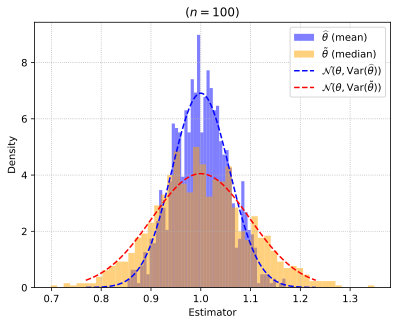

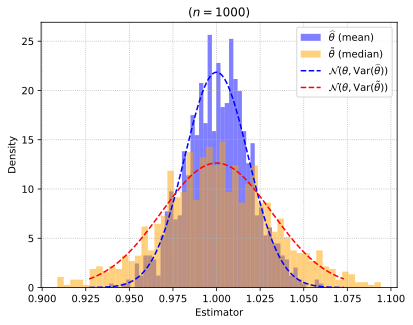

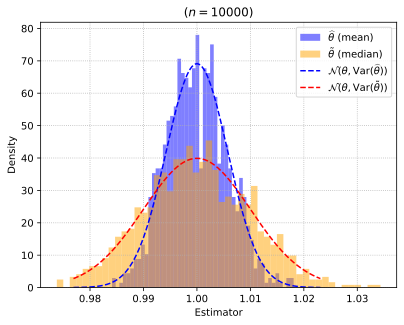

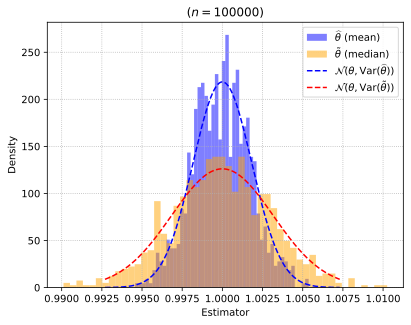

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

theta = 1  
sample_sizes = [100, 1000, 10000, 100000]  
N_samples = 1000 

def simulate_estimators(n, theta, N_samples):
    samples = np.random.uniform(0, 2 * theta, size=(N_samples, n))
    means = samples.mean(axis=1)  
    medians = np.median(samples, axis=1) 
    return means, medians

def plot_estimators_reduced(n, means, medians, theta):
    var_mean = theta**2 / (3 * n)
    var_median = theta**2 / (n + 3)
    
    xs = np.linspace(theta - 4 * np.sqrt(var_mean), theta + 4 * np.sqrt(var_mean), 500)
    
    plt.hist(means, bins=50, density=True, alpha=0.5, label=r"$\widehat{\theta}$ (mean)", color="blue")
    plt.hist(medians, bins=50, density=True, alpha=0.5, label=r"$\tilde{\theta}$ (median)", color="orange")
    plt.plot(xs, norm.pdf(xs, theta, np.sqrt(var_mean)), "b--", label=r"$\mathcal{N}(\theta, \mathrm{Var}(\widehat{\theta}))$")
    plt.plot(xs, norm.pdf(xs, theta, np.sqrt(var_median)), "r--", label=r"$\mathcal{N}(\theta, \mathrm{Var}(\tilde{\theta}))$")
    plt.title(f"($n={n}$)")
    plt.xlabel("Estimator")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(ls=":")
    plt.show()

for n in sample_sizes:  
    means, medians = simulate_estimators(n, theta, N_samples)
    plot_estimators_reduced(n, means, medians, theta)

